### Visualizing the Titanic Disaster

#### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at Kaggle.
To know more about the variables check here

Step 1. Import the necessary libraries

In [22]:
# The usual preamble
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
InteractiveShell.ast_node_interactivity = "all"

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')

# This is necessary to show lots of columns in pandas 0.12.
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)
plt.rcParams['figure.figsize'] = (15, 5)


Step 2. Assign it to a variable titanic

In [5]:
titanic = pd.read_csv("./data/titanic.csv")
titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Step 3. Set PassengerId as the index

In [6]:
titanic.set_index("PassengerId")


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Step 4. Create a pie chart presenting the male/female proportion

577

314

([<matplotlib.patches.Wedge at 0x1ea4bc14490>,
 [Text(-1.1180280462672743, -0.5590288791822674, 'Males'),
  Text(0.9838646346559433, 0.4919455057964524, 'Females')],
 [Text(-0.6708168277603644, -0.3354173275093604, '64.8%'),
  Text(0.53665343708506, 0.2683339122526104, '35.2%')])

(-1.240871431441621,
 1.1067075700472628,
 -1.1704372005955925,
 1.103354152409314)

Text(0.5, 1.0, 'Sex Proportion')

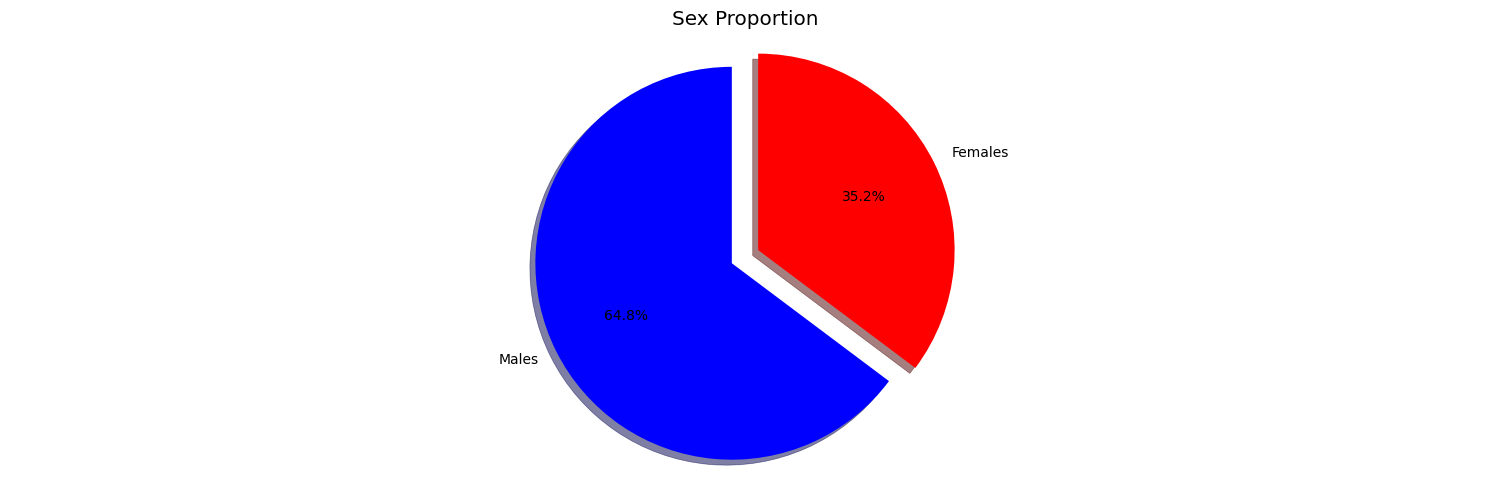

In [21]:
males = (titanic['Sex'] == 'male').sum()
males

females = (titanic['Sex'] == 'female').sum()
females

proportions = [males, females]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,

    # with the labels being officer names
    labels=['Males', 'Females'],

    # with no shadows
    shadow=True,

    # with colors
    colors=['blue', 'red'],

    # with one slide exploded out
    explode=(0.15, 0),

    # with the start angle at 90%
    startangle=90,

    # with the percent listed as a fraction
    autopct='%1.1f%%'
)

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion")

# View the plot
plt.tight_layout()
plt.show()


Step 5. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

(-5.0, 537.94566)

(-5.0, 85.0)

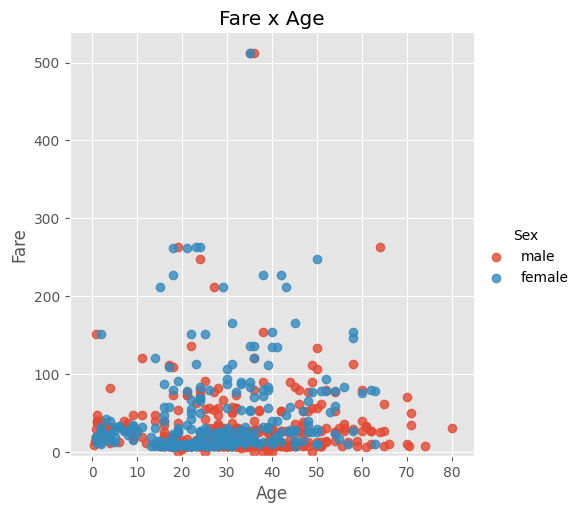

In [23]:
# creates the plot using
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

# set title
lm.set(title = 'Fare x Age')

# get the axes object and tweak it
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

Step 6. How many people survived?

In [15]:
titanic_survived_filter = (titanic["Survived"] == 1)
titanic_survived_filter[titanic_survived_filter].shape[0]


342

In [27]:
titanic.Survived.sum()

342